# Data processing

## Imports and globals

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
FILE_NAME = "datos-crudos.csv"
UNUSED_COLUMNS = ["nombre", "historia", "fecha", "diagnostico"]

In [4]:
df = pd.read_csv(FILE_NAME)
print(df.head())

                      nombre  edad  historia     fecha  cancer  diagnostico  \
0                        NaN   NaN       NaN       NaN     NaN          NaN   
1  HELIODORO GONZALEZ OLIVER  75.0  101185.0  17/07/24     1.0          NaN   
2    EMILIO MARTINEZ GARRIDO  65.0  125537.0  20/10/24     1.0          NaN   
3     ANTONIO SANCHIS GIMENO  65.0  781746.0  13/02/24     1.0          NaN   
4   ALMUDENA MOLINA MARTINEZ  49.0  137087.0  28/12/23     1.0          NaN   

   filtrado-glomerular-estimado  glucosa creatinina  urea  ... eosinofilos  \
0                           NaN      NaN        NaN   NaN  ...         NaN   
1                          61.0    106.0       1,17   NaN  ...         3,7   
2                          40.0    311.0       1,74  75.0  ...           0   
3                          96.0     92.0       0,76  26.0  ...         0,5   
4                           NaN     88.0       0,73  27.0  ...         2,5   

  basofilos    N    L    M    E    B plaquetas  MPV  \
0

In [5]:
# Remove unused columns
df = df.drop(columns=UNUSED_COLUMNS)

In [6]:
# Convert every string into float value
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
# Convert every value other than 0 in "cancer" to 1
df['cancer'] = df['cancer'].apply(lambda x: 1 if x != 0 else x)

## Multivariant Analysis

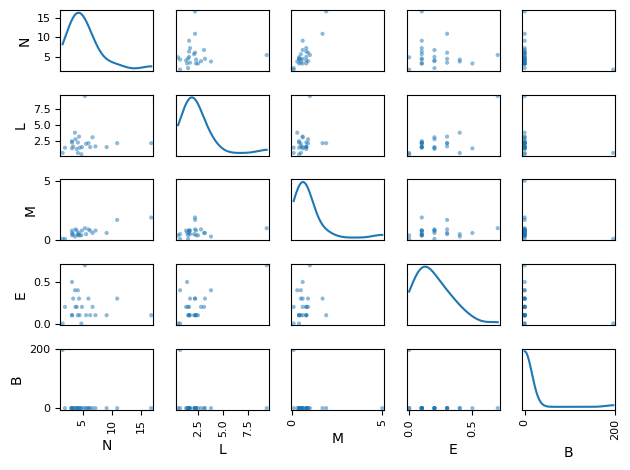

In [8]:
pd.plotting.scatter_matrix(df.loc[:, "N":"B"], diagonal="kde")
plt.tight_layout()
plt.show()

In [9]:
corr = df.loc[:, "N":"B"].corr()
corr.style.background_gradient(cmap='coolwarm')
corr

,N,L,M,E,B
N,1.000000,0.060797,0.829495,-0.097478,-0.243109
L,0.060797,1.000000,0.222699,0.652037,-0.191081
M,0.829495,0.222699,1.000000,0.153775,-0.164580
E,-0.097478,0.652037,0.153775,1.000000,-0.253979
B,-0.243109,-0.191081,-0.164580,-0.253979,1.000000


In [10]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

i = 0
for s in so.items():
    if(s[1] > 0.9 and s[1] < 0.99): print(s[0], s[1])
    i += 1

('globulina-beta-n', 'RDW') 0.98991369636044
('RDW', 'globulina-beta-n') 0.98991369636044
('sodio', 'proteinas-total') 0.9897857123558818
('proteinas-total', 'sodio') 0.9897857123558818
('cloruro', 'globulina-gamma-n') 0.9896591825705163
('globulina-gamma-n', 'cloruro') 0.9896591825705163
('cloruro', 'globulina-alfa1-n') 0.9893439821314411
('globulina-alfa1-n', 'cloruro') 0.9893439821314411
('cloruro', 'globulina-alfa2-n') 0.9892001826088418
('globulina-alfa2-n', 'cloruro') 0.9892001826088418
('MCHC', 'albumina-globulinas') 0.9888708487703134
('albumina-globulinas', 'MCHC') 0.9888708487703134
('sodio', 'fosfato') 0.9882682296012958
('fosfato', 'sodio') 0.9882682296012958
('MCH', 'bilirrubina-indirecta') 0.9872579965826326
('bilirrubina-indirecta', 'MCH') 0.9872579965826326
('proteinas-total', 'fosfato') 0.9870838510472294
('fosfato', 'proteinas-total') 0.9870838510472294
('globulina-alfa1-n', 'potasio') 0.9863938002570779
('potasio', 'globulina-alfa1-n') 0.9863938002570779
('proteinas-

## Random forest formula

In [11]:
def RandomForest(iterations, _df, _target):
    # Make a loop of train and test sepparations with different random states
    results = []
    for i in range(iterations):
        # Prepare a random forest classifier and use df_filled with sepparated trained and test fragments
        clf = RandomForestClassifier(n_estimators=100)
        X_train, X_test, y_train, y_test = train_test_split(_df, _target, test_size=0.2, random_state=i)
        # Train the classifier
        clf.fit(X_train, y_train)
        # Show results
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        # Save the resulting model in an array of results
        results.append(clf)
    return results, X_train, X_test, y_train, y_test

In [12]:
def ConfusionMatrix(results, X_test, y_test):
    # Create a resulting y_test and y_pred from the results
    y_pred_m = []
    y_test_m = []
    for i in range(len(results)):
        y_pred_m.extend(results[i].predict(X_test))
        y_test_m.extend(y_test)
    # Classification matrix with the real target and predicted target
    sns.heatmap(pd.crosstab(y_test_m, y_pred_m, rownames=['Real'], colnames=['Predicción']), annot=True, fmt='d')
    plt.show()
    return y_test_m, y_pred_m

## Full data classification

In [13]:
# Drop rows that have at least one empty data
df_full_data = df.dropna(axis=1)
# Print the columns names
print(df_full_data.columns)

Index(['cancer'], dtype='object')


In [14]:
c = df_full_data.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

i = 0
for s in so.items():
    if(s[1] > 0.6 and s[1] < 0.99): print(s[0], s[1])
    i += 1

In [15]:
# Sepparate the "cancer" column into a target dataframe
target_full_data = df_full_data["cancer"]
# Drop the "cancer" column from the dataframe
df_full_data = df_full_data.drop(columns=["cancer"])

In [16]:
# Make a loop of train and test sepparations with different random states
results = []
results, X_train, X_test, y_train, y_test = RandomForest(10, df_full_data, target_full_data)

ValueError: at least one array or dtype is required

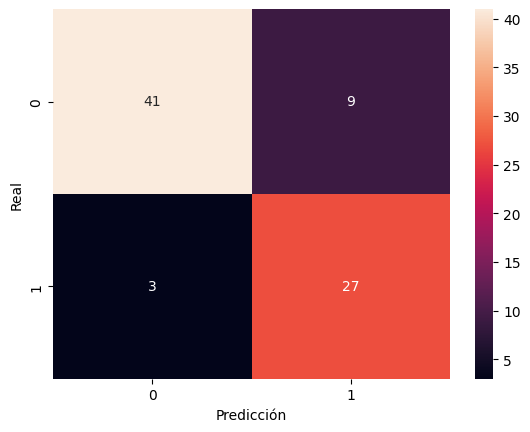

In [ ]:
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

## Filling data

In [17]:
# On df assume an empty dala cell has the same value as the mode of that column, set the result and save it in a dataframe
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" else x)

### Random Forest

In [18]:
# target is "cancer"
target_filled = df_filled["cancer"]
# Drop the "cancer" column from the dataframe
df_filled = df_filled.drop(columns=["cancer"])
results, X_train, X_test, y_train, y_test = RandomForest(1, df_filled, target_filled)

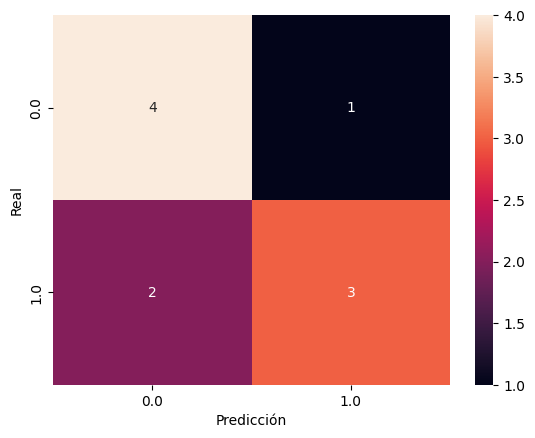

In [19]:
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

## Blood data

In [40]:
BLOOD_COLUMNS = ["cancer", "hematies","hemoglobina","hematocrito","MCV","MCH","MCHC","RDW","leucocitos","neutrofilos","linfocitos","monocitos","eosinofilos","basofilos","N","L","M","E","B","plaquetas","MPV"]

In [41]:
df_blood = df[BLOOD_COLUMNS]
# Sepparate cancer target
target_blood = df_blood["cancer"]
df_blood = df_blood.drop("cancer", axis=1)
print(len(df_blood))
print(df_blood.columns)

47
Index(['hematies', 'hemoglobina', 'hematocrito', 'MCV', 'MCH', 'MCHC', 'RDW',
       'leucocitos', 'neutrofilos', 'linfocitos', 'monocitos', 'eosinofilos',
       'basofilos', 'N', 'L', 'M', 'E', 'B', 'plaquetas', 'MPV'],
      dtype='object')


In [45]:
results, X_train, X_test, y_train, y_test = RandomForest(1, df_blood, target_blood)

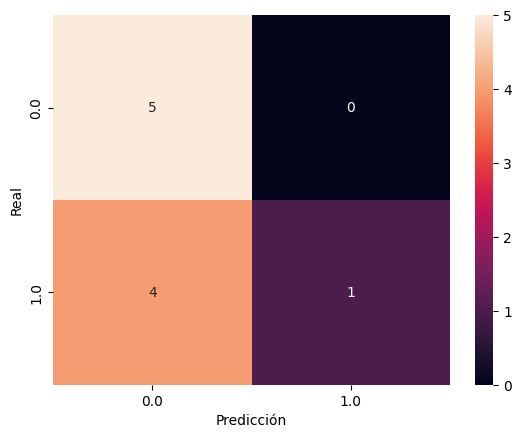

In [46]:
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

## New Calculations with blood values

Add a new column for L+M.

C:\Users\Luis\AppData\Local\Temp\ipykernel_4964\637050071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t1["L+M"] = df_t1["L"] + df_t1["M"]


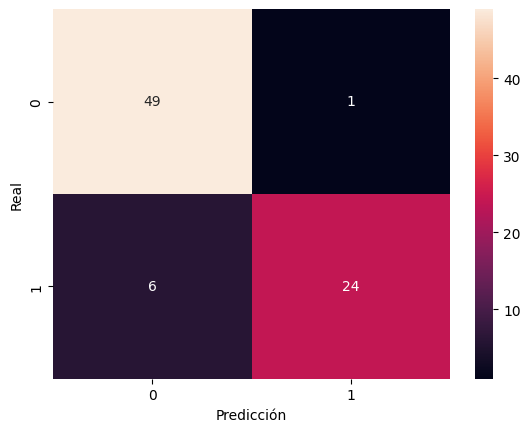

In [ ]:
df_t1 = df[BLOOD_COLUMNS]
df_t1["L+M"] = df_t1["L"] + df_t1["M"]
# Sepparate cancer target
target_t1 = df_t1["cancer"]
df_t1 = df_t1.drop("cancer", axis=1)
# Training
results, X_train, X_test, y_train, y_test = RandomForest(10, df_t1, target_t1)
# Results
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

Proportion of L / N.

C:\Users\Luis\AppData\Local\Temp\ipykernel_4964\2857331678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t2["L/N"] = df_t2["L"] / df_t2["N"]


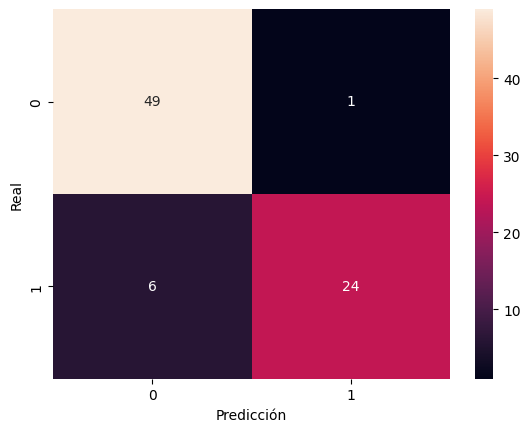

In [ ]:
df_t2 = df[BLOOD_COLUMNS]
df_t2["L/N"] = df_t2["L"] / df_t2["N"]
# Sepparate cancer target
target_t2 = df_t2["cancer"]
df_t2 = df_t2.drop("cancer", axis=1)
# Training
results, X_train, X_test, y_train, y_test = RandomForest(10, df_t2, target_t2)
# Results
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

Relation of M / N.

C:\Users\Luis\AppData\Local\Temp\ipykernel_4964\66641417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t3["M/N"] = df_t3["M"] / df_t3["N"]


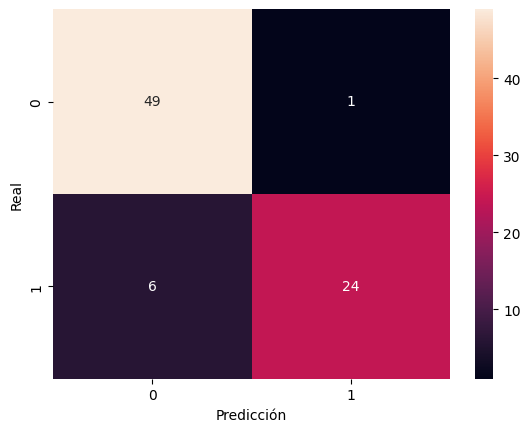

In [ ]:
df_t3 = df[BLOOD_COLUMNS]
df_t3["M/N"] = df_t3["M"] / df_t3["N"]
# Sepparate cancer target
target_t3 = df_t3["cancer"]
df_t3 = df_t3.drop("cancer", axis=1)
# Training
results, X_train, X_test, y_train, y_test = RandomForest(10, df_t3, target_t3)
# Results
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

Calculation of (L+M)N.

C:\Users\Luis\AppData\Local\Temp\ipykernel_4964\2017037675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t4["(L+M)/N"] = (df_t4["L"] + df_t4["M"]) / df_t4["N"]


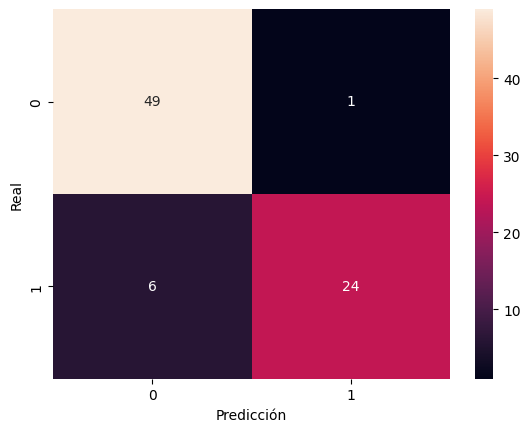

In [ ]:
df_t4 = df[BLOOD_COLUMNS]
df_t4["(L+M)/N"] = (df_t4["L"] + df_t4["M"]) / df_t4["N"]
# Sepparate cancer target
target_t4 = df_t4["cancer"]
df_t4 = df_t4.drop("cancer", axis=1)
# Training
results, X_train, X_test, y_train, y_test = RandomForest(10, df_t4, target_t4)
# Results
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)